In [1]:
# Importing dependancies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Importing csv for data generation
df = pd.read_csv("Output/drug-overdose_region.csv")
reg_pivot = pd.DataFrame(df).set_index("Subject")
reg_pivot

,1,2,3,4
Subject,,,,
Cocaine (T40.5),28465.0,25611.0,23322.0,3361.0
Heroin (T40.1),30446.0,29933.0,24580.0,9153.0
"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",75698.0,64572.0,75752.0,18440.0
Number of Deaths,5967066.0,7023764.0,12094654.0,6006006.0
Number of Drug Overdose Deaths,193993.0,180124.0,270516.0,124627.0
Psychostimulants with abuse potential (T43.6),3774.0,8039.0,14732.0,14288.0
Alcohol,4785.0,7338.0,12037.0,11664.0
Drug Arrests,228158.0,201279.0,552370.0,321451.0


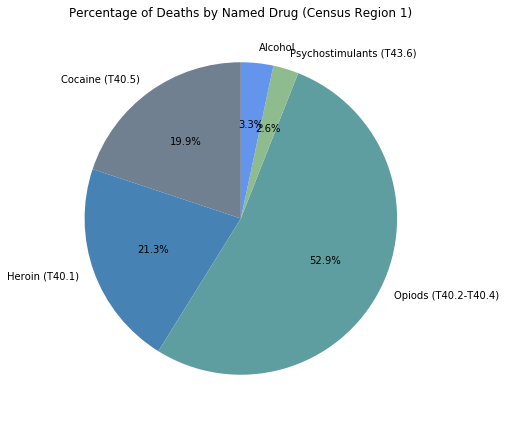

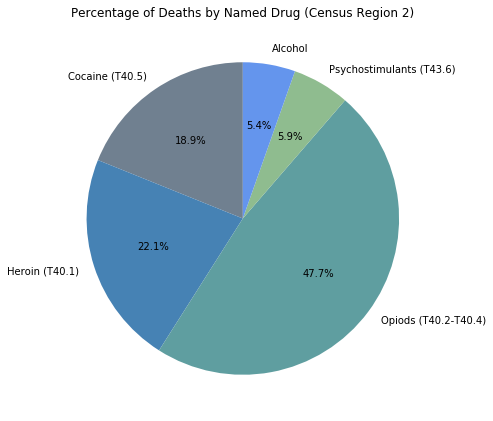

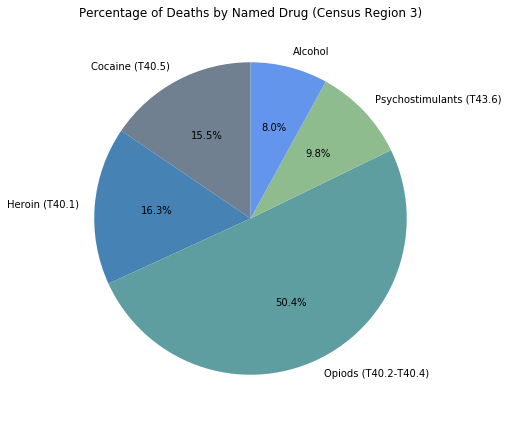

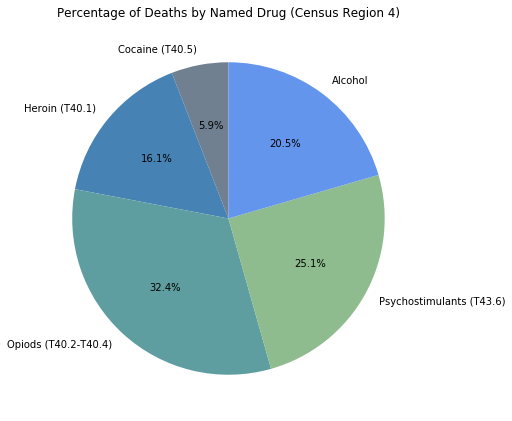

In [5]:
named_drugs_reg = reg_pivot.drop(["Number of Deaths", "Number of Drug Overdose Deaths","Drug Arrests"])
named_drugs_reg = named_drugs_reg.rename({"Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)":"Opiods (T40.2-T40.4)",
                                          "Psychostimulants with abuse potential (T43.6)": "Psychostimulants (T43.6)"})

# Data to plot
labels = named_drugs_reg.index
named_deaths_ax1_sizes = named_drugs_reg["1"]
named_deaths_ax2_sizes = named_drugs_reg["2"]
named_deaths_ax3_sizes = named_drugs_reg["3"]
named_deaths_ax4_sizes = named_drugs_reg["4"]
colors = ["slategray", "steelblue", "cadetblue", "darkseagreen","cornflowerblue"]

# Plot Census Region 1
fig1, named_deaths_ax1 = plt.subplots(figsize=(7, 8))
named_deaths_ax1.pie(named_deaths_ax1_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax1.set(aspect="equal", title="Percentage of Deaths by Named Drug (Census Region 1)")

plt.savefig("Output/per_drug/per_drug_1")
plt.show()

#Plot Census Region 2
fig2, named_deaths_ax2 = plt.subplots(figsize=(7, 8))
named_deaths_ax2.pie(named_deaths_ax2_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax2.set(aspect="equal", title="Percentage of Deaths by Named Drug (Census Region 2)")

plt.savefig("Output/per_drug/per_drug_2")
plt.show()

#Plot Census Region 3
fig3, named_deaths_ax3 = plt.subplots(figsize=(7, 8))
named_deaths_ax3.pie(named_deaths_ax3_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax3.set(aspect="equal", title="Percentage of Deaths by Named Drug (Census Region 3)")

plt.savefig("Output/per_drug/per_drug_3")
plt.show()

#Plot Census Region 3
fig4, named_deaths_ax4 = plt.subplots(figsize=(7, 8))
named_deaths_ax4.pie(named_deaths_ax4_sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
named_deaths_ax4.set(aspect="equal", title="Percentage of Deaths by Named Drug (Census Region 4)")

plt.savefig("Output/per_drug/per_drug_4")
plt.show()

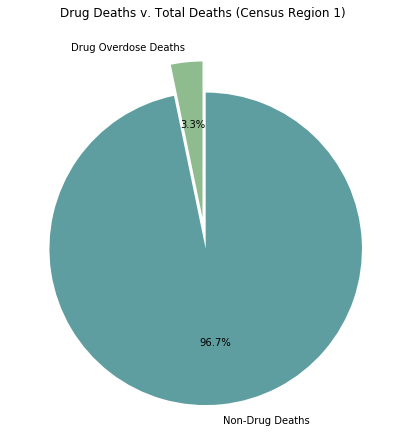

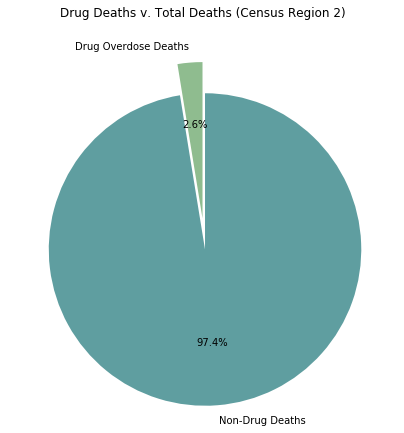

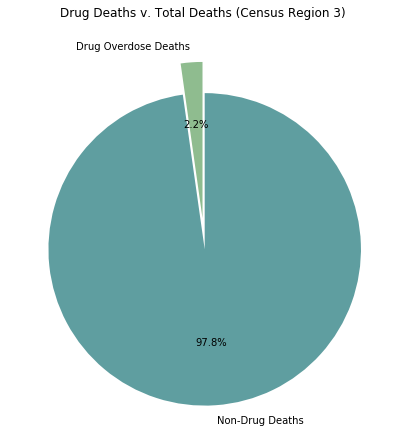

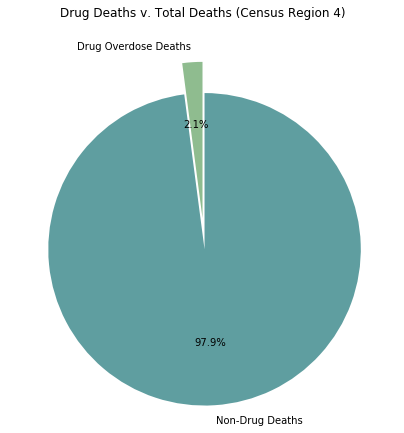

In [7]:
total_death_reg = reg_pivot.drop(["Cocaine (T40.5)", "Heroin (T40.1)", "Alcohol",
                                  "Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)",
                                  "Psychostimulants with abuse potential (T43.6)", "Drug Arrests"])
total_death_reg = total_death_reg.append(pd.Series(name="Non-Drug Deaths"))
total_death_reg.loc["Non-Drug Deaths"] = total_death_reg.loc["Number of Deaths"] - total_death_reg.loc["Number of Drug Overdose Deaths"]
total_death_reg = total_death_reg.rename({"Number of Drug Overdose Deaths": "Drug Overdose Deaths"})
total_death_reg = total_death_reg.drop("Number of Deaths")

# Data to plot
labels = total_death_reg.index
death_ax1_sizes = total_death_reg["1"]
death_ax2_sizes = total_death_reg["2"]
death_ax3_sizes = total_death_reg["3"]
death_ax4_sizes = total_death_reg["4"]
colors = ["darkseagreen","cadetblue"]

# Plot Census Region 1
fig1, death_ax1 = plt.subplots(figsize=(7, 8))
death_ax1.pie(death_ax1_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax1.set(aspect="equal", title="Drug Deaths v. Total Deaths (Census Region 1)")

plt.savefig("Output/death_totals/death_tot_1")
plt.show()

#Plot Census Region 2
fig2, death_ax2 = plt.subplots(figsize=(7, 8))
death_ax2.pie(death_ax2_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax2.set(aspect="equal", title="Drug Deaths v. Total Deaths (Census Region 2)")

plt.savefig("Output/death_totals/death_tot_2")
plt.show()

#Plot Census Region 3
fig3, death_ax3 = plt.subplots(figsize=(7, 8))
death_ax3.pie(death_ax3_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax3.set(aspect="equal", title="Drug Deaths v. Total Deaths (Census Region 3)")

plt.savefig("Output/death_totals/death_tot_3")
plt.show()

#Plot Census Region 3
fig4, death_ax4 = plt.subplots(figsize=(7, 8))
death_ax4.pie(death_ax4_sizes, labels=labels, colors = colors, explode = (0, 0.2), autopct='%1.1f%%', startangle=90)
death_ax4.set(aspect="equal", title="Drug Deaths v. Total Deaths (Census Region 4)")

plt.savefig("Output/death_totals/death_tot_4")
plt.show()
